In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/Titanic-Dataset.csv')

# First look at the data
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Number of rows: 891
Number of columns: 12

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check missing values
print("Missing values:")
print(df.isnull().sum())
print("\nMissing value percentages:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing value percentages:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [5]:
# Statistical summary of numerical features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival Rate:
Survived
0    549
1    342
Name: count, dtype: int64

Percentage:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


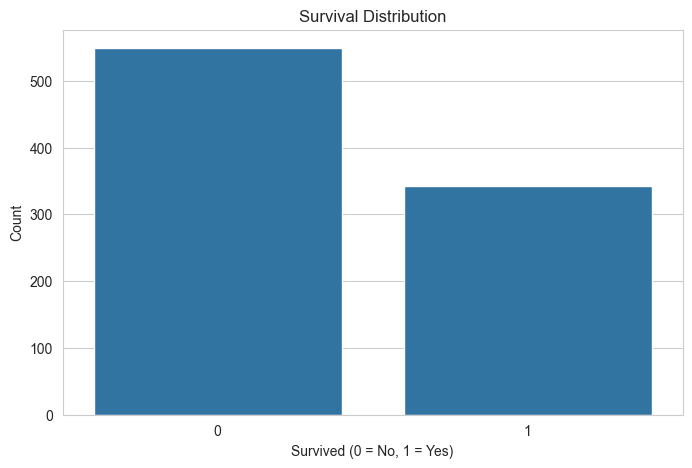

In [6]:
# Survival rate
print("Survival Rate:")
print(df['Survived'].value_counts())
print("\nPercentage:")
print(df['Survived'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Survival by Gender:
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


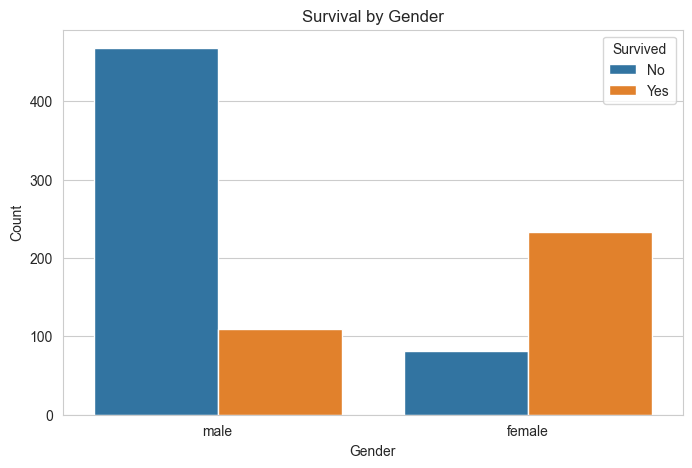

In [7]:
# Survival rate by gender
print("Survival by Gender:")
print(pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

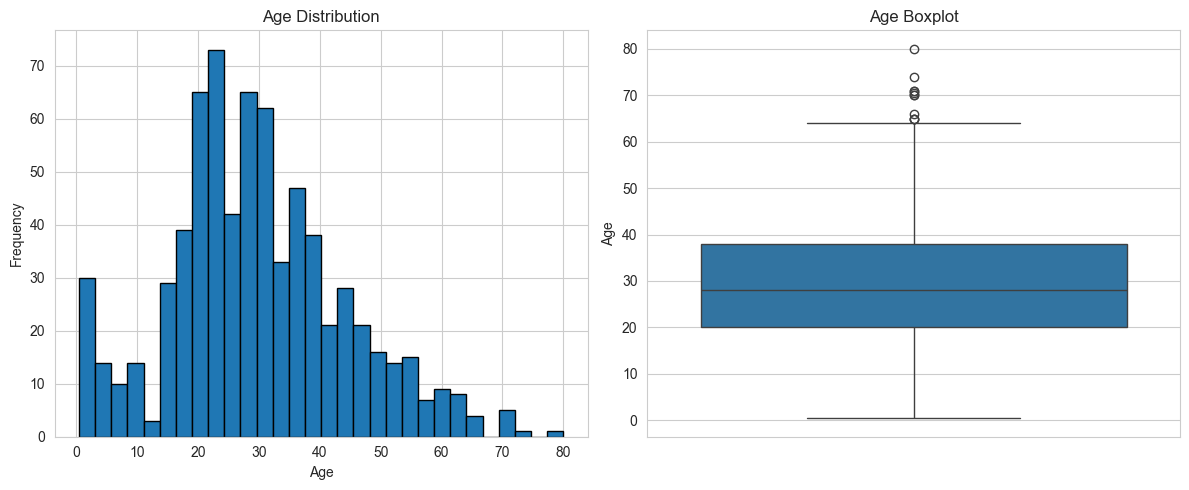

Age statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [8]:
# Age distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Age'].hist(bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Age Boxplot')

plt.tight_layout()
plt.show()

print(f"Age statistics:")
print(df['Age'].describe())

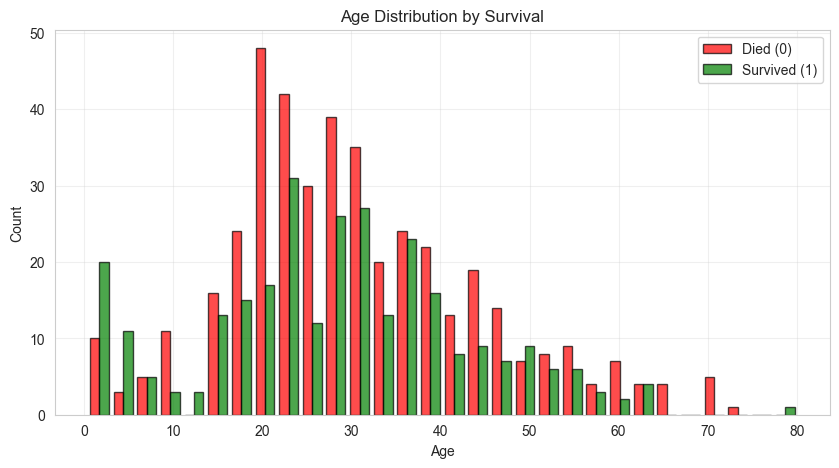

Total died: 549
Total survived: 342


In [12]:
# Survival by age (compare survived vs not survived)
plt.figure(figsize=(10, 5))

died = df[df['Survived'] == 0]['Age']
survived = df[df['Survived'] == 1]['Age']

plt.hist([died, survived], bins=30, label=['Died (0)', 'Survived (1)'],
        color=['red', 'green'], alpha=0.7, edgecolor='black')

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Total died: {len(died)}")
print(f"Total survived: {len(survived)}")

Survival Rate by Age Group (%)
Survived                     0          1
AgeGroup                                 
Child (0-12)         42.028986  57.971014
Teen (13-18)         57.142857  42.857143
Adult (19-35)        61.731844  38.268156
Middle-Aged (36-60)  60.000000  40.000000
Senior (60+)         77.272727  22.727273


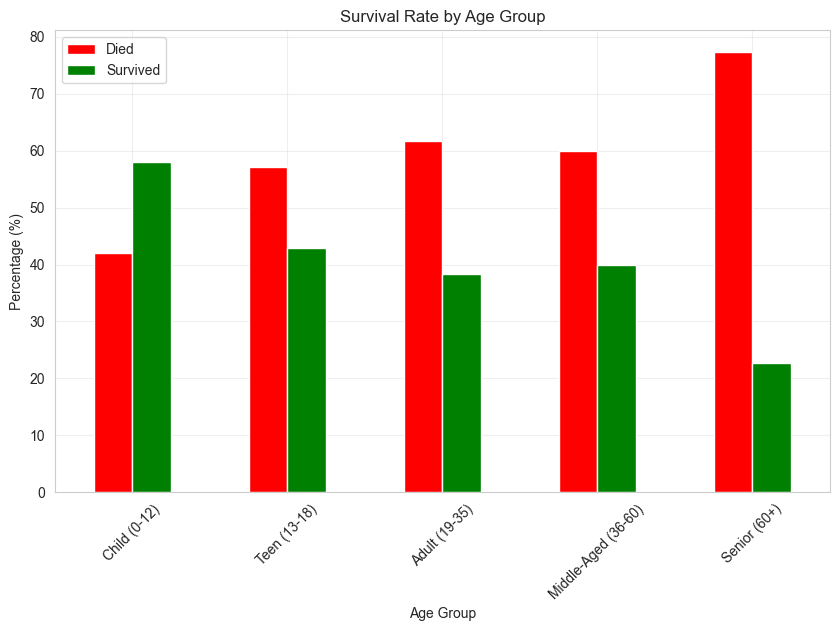

In [13]:
# Create age gropus
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child (0-12)', 'Teen (13-18)', 'Adult (19-35)', 
                        'Middle-Aged (36-60)', 'Senior (60+)'])

# Survival rate age group
age_survival = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index') * 100
print("Survival Rate by Age Group (%)")
print(age_survival)

# Visualization
age_survival.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

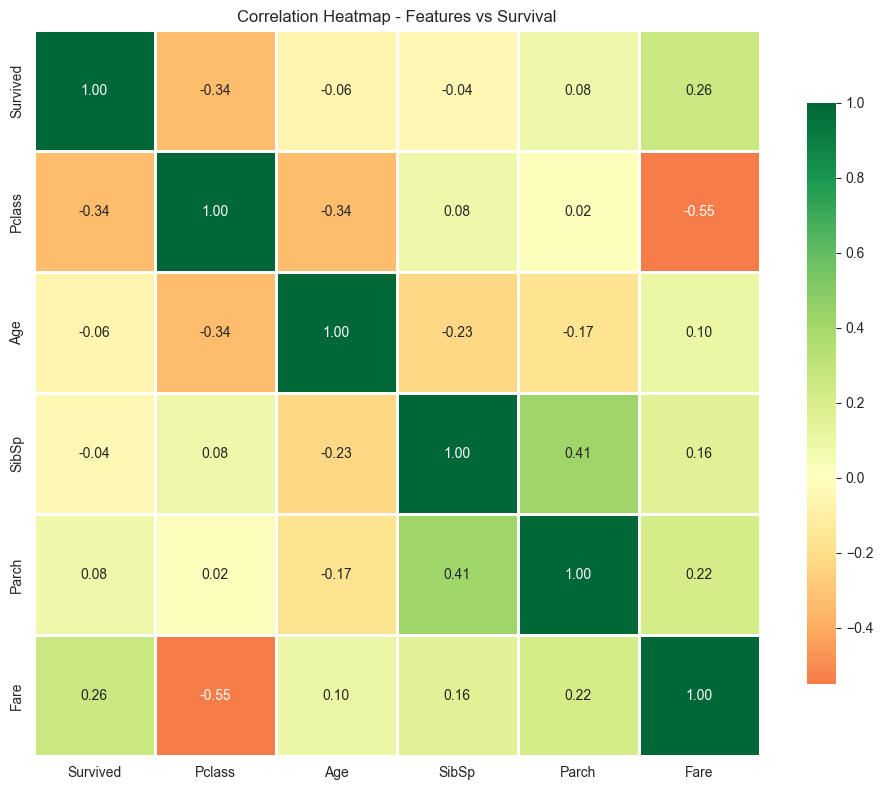


Correlation with Survival (sorted):
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64


In [15]:
# Drop AgeGroup (categorical) for correlation
numerical_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

# Fill missing Age values temporarily for correlation
numerical_df['Age'].fillna(numerical_df['Age'].median(), inplace=True)

# Calculate correlation
correlation = numerical_df.corr()

# Viusalization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Features vs Survival')
plt.tight_layout()
plt.show()

print("\nCorrelation with Survival (sorted):")
print(correlation['Survived'].sort_values(ascending=False))

Survival Rate by Family Size:
                mean  count
FamilySize                 
1           0.303538    537
2           0.552795    161
3           0.578431    102
4           0.724138     29
5           0.200000     15
6           0.136364     22
7           0.333333     12
8           0.000000      6
11          0.000000      7


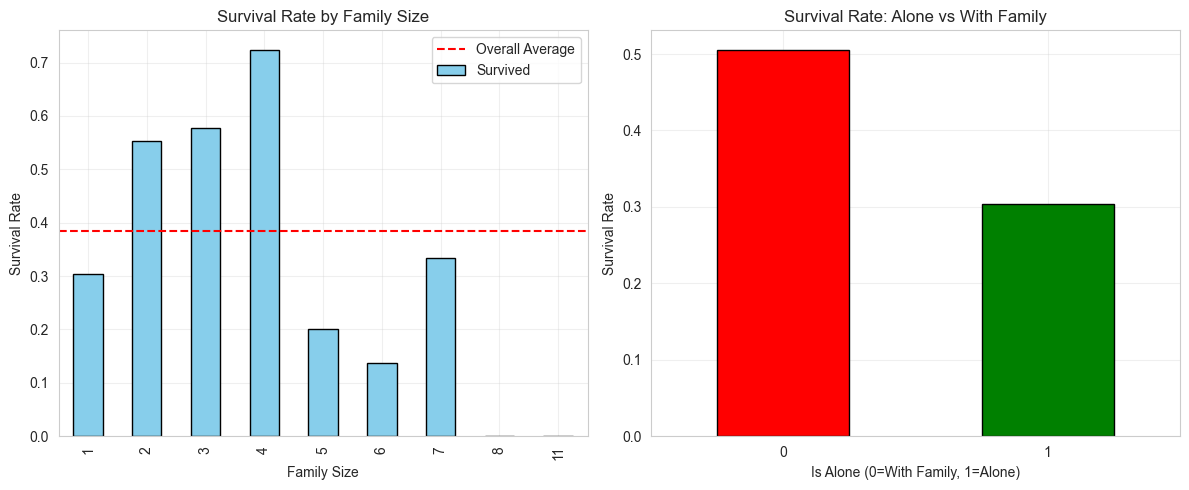


Alone Survival Rate: 30.35%

With Family Survival Rate: 50.56%


In [16]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the passenger themselves

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] ==1 ).astype(int)

# Survival by family size
family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'count'])
print("Survival Rate by Family Size:")
print(family_survival)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.axhline(y=df['Survived'].mean(), color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
df.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Survival Rate: Alone vs With Family')
plt.xlabel('Is Alone (0=With Family, 1=Alone)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAlone Survival Rate: {df[df['IsAlone']==1]['Survived'].mean():.2%}")
print(f"\nWith Family Survival Rate: {df[df['IsAlone']==0]['Survived'].mean():.2%}")

Embarkation Ports:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Missing values: 2

Survival Rate by Embarkation Port:
Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


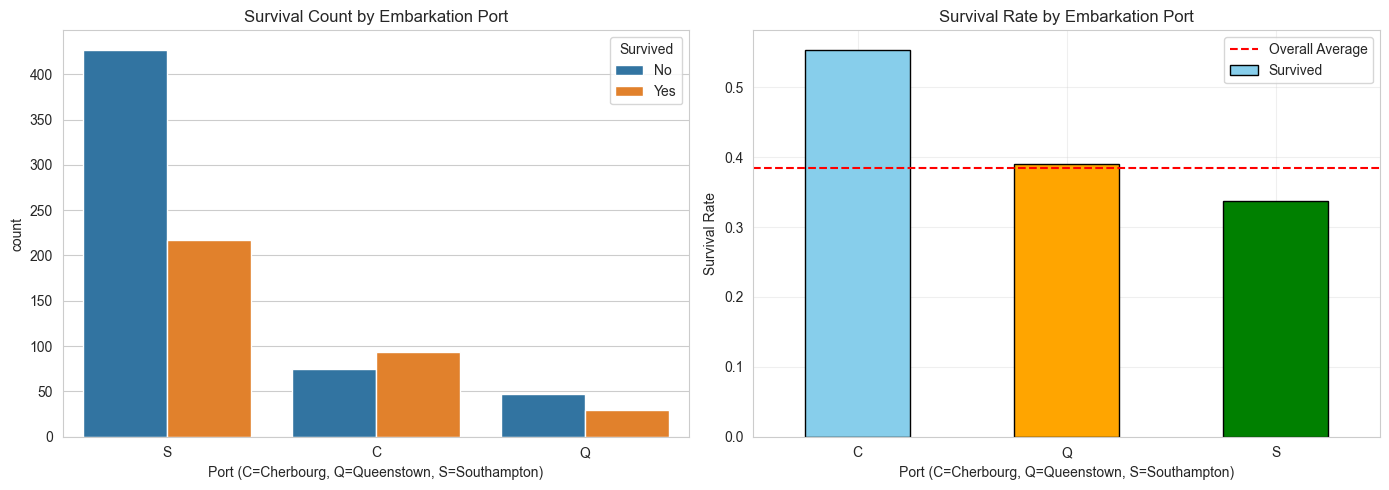

In [17]:
# Check embarkation values
print("Embarkation Ports:")
print(df['Embarked'].value_counts())
print(f"\nMissing values: {df['Embarked'].isnull().sum()}")

# Survival by embarkation
print("\nSurvival Rate by Embarkation Port:")
embark_survival = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
print(embark_survival)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[0])
axes[0].set_title('Survival Count by Embarkation Port')
axes[0].set_xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Survival rate
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[1], 
                                                color=['skyblue', 'orange', 'green'], 
                                                edgecolor='black')
axes[1].set_title('Survival Rate by Embarkation Port')
axes[1].set_xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[1].set_ylabel('Survival Rate')
axes[1].axhline(y=df['Survived'].mean(), color='r', linestyle='--', label='Overall Average')
axes[1].legend()
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Passenger Class Distribution by Embarkation Port:
Pclass            1          2          3
Embarked                                 
C         50.595238  10.119048  39.285714
Q          2.597403   3.896104  93.506494
S         19.720497  25.465839  54.813665

Average Fare by Embarkation Port:
Embarked
C    59.954144
S    27.079812
Q    13.276030
Name: Fare, dtype: float64

Gender Distribution by Embarkation Port:
Sex          female       male
Embarked                      
C         43.452381  56.547619
Q         46.753247  53.246753
S         31.521739  68.478261


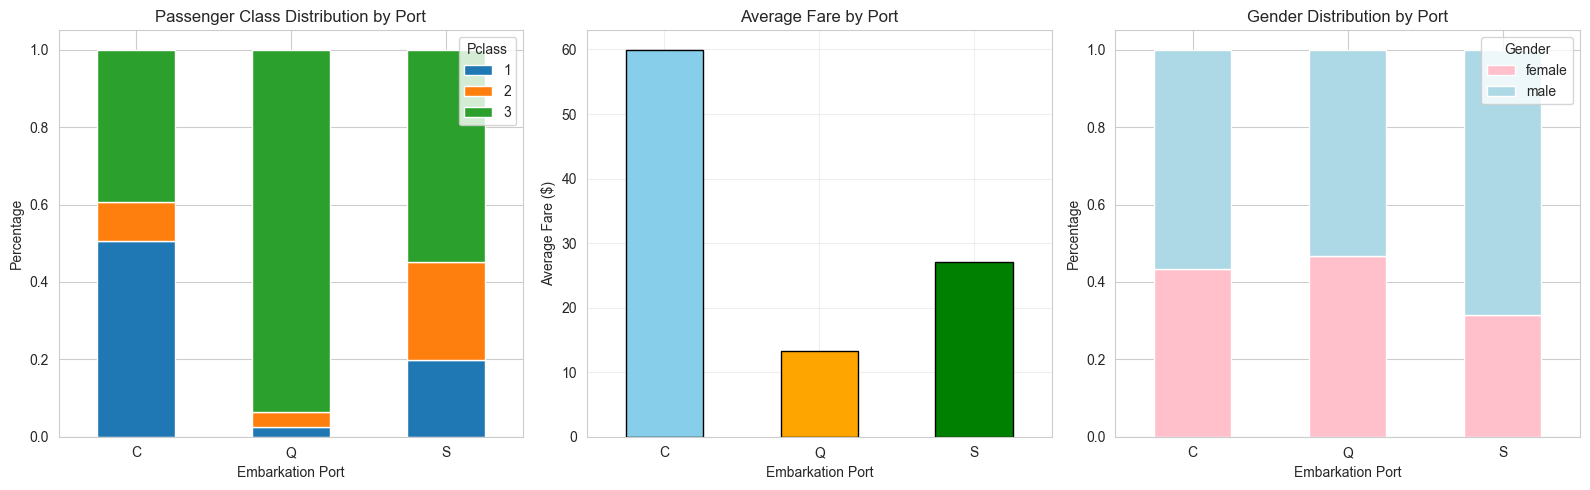

In [18]:
# Analyze passenger class by embarkation
print("Passenger Class Distribution by Embarkation Port:")
print(pd.crosstab(df['Embarked'], df['Pclass'], normalize='index') * 100)

print("\n" + "="*50)
print("Average Fare by Embarkation Port:")
print(df.groupby('Embarked')['Fare'].mean().sort_values(ascending=False))

print("\n" + "="*50)
print("Gender Distribution by Embarkation Port:")
print(pd.crosstab(df['Embarked'], df['Sex'], normalize='index') * 100)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pclass distribution
pd.crosstab(df['Embarked'], df['Pclass'], normalize='index').plot(kind='bar', 
                                                                    ax=axes[0], 
                                                                    stacked=True)
axes[0].set_title('Passenger Class Distribution by Port')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Embarkation Port')
axes[0].legend(title='Pclass')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Average Fare
df.groupby('Embarked')['Fare'].mean().plot(kind='bar', ax=axes[1], 
                                            color=['skyblue', 'orange', 'green'], 
                                            edgecolor='black')
axes[1].set_title('Average Fare by Port')
axes[1].set_ylabel('Average Fare ($)')
axes[1].set_xlabel('Embarkation Port')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(alpha=0.3)

# Gender distribution
pd.crosstab(df['Embarked'], df['Sex'], normalize='index').plot(kind='bar', 
                                                                ax=axes[2], 
                                                                stacked=True,
                                                                color=['pink', 'lightblue'])
axes[2].set_title('Gender Distribution by Port')
axes[2].set_ylabel('Percentage')
axes[2].set_xlabel('Embarkation Port')
axes[2].legend(title='Gender')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [19]:
print("="*60)
print("          TITANIC EDA - KEY FINDINGS SUMMARY")
print("="*60)

print("\n🎯 KEY SURVIVAL FACTORS (Ranked by Importance):\n")

print("1. 👗 GENDER (Most Important - Not in correlation due to categorical)")
print(f"   - Female survival: {df[df['Sex']=='female']['Survived'].mean():.1%}")
print(f"   - Male survival: {df[df['Sex']=='male']['Survived'].mean():.1%}")

print("\n2. 🎫 PASSENGER CLASS (Correlation: -0.338)")
print(f"   - 1st class survival: {df[df['Pclass']==1]['Survived'].mean():.1%}")
print(f"   - 2nd class survival: {df[df['Pclass']==2]['Survived'].mean():.1%}")
print(f"   - 3rd class survival: {df[df['Pclass']==3]['Survived'].mean():.1%}")

print("\n3. 👶 AGE")
print(f"   - Child (0-12) survival: {df[df['AgeGroup']=='Child (0-12)']['Survived'].mean():.1%}")
print(f"   - Adult (19-35) survival: {df[df['AgeGroup']=='Adult (19-35)']['Survived'].mean():.1%}")
print(f"   - Senior (60+) survival: {df[df['AgeGroup']=='Senior (60+)']['Survived'].mean():.1%}")

print("\n4. 👨‍👩‍👧‍👦 FAMILY SIZE")
print(f"   - Alone survival: {df[df['IsAlone']==1]['Survived'].mean():.1%}")
print(f"   - With family survival: {df[df['IsAlone']==0]['Survived'].mean():.1%}")

print("\n5. ⚓ EMBARKATION PORT")
print(f"   - Cherbourg (C) survival: {df[df['Embarked']=='C']['Survived'].mean():.1%}")
print(f"   - Southampton (S) survival: {df[df['Embarked']=='S']['Survived'].mean():.1%}")

print("\n6. 💰 FARE (Correlation: 0.257)")
print(f"   - Average fare of survivors: ${df[df['Survived']==1]['Fare'].mean():.2f}")
print(f"   - Average fare of victims: ${df[df['Survived']==0]['Fare'].mean():.2f}")

print("\n" + "="*60)
print("📊 MISSING DATA TO HANDLE:")
print("="*60)
print(f"   - Age: {df['Age'].isnull().sum()} missing ({df['Age'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   - Cabin: {df['Cabin'].isnull().sum()} missing ({df['Cabin'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   - Embarked: {df['Embarked'].isnull().sum()} missing ({df['Embarked'].isnull().sum()/len(df)*100:.1f}%)")

print("\n" + "="*60)
print("🚀 NEXT STEPS: Data Preprocessing & Model Development")
print("="*60)

          TITANIC EDA - KEY FINDINGS SUMMARY

🎯 KEY SURVIVAL FACTORS (Ranked by Importance):

1. 👗 GENDER (Most Important - Not in correlation due to categorical)
   - Female survival: 74.2%
   - Male survival: 18.9%

2. 🎫 PASSENGER CLASS (Correlation: -0.338)
   - 1st class survival: 63.0%
   - 2nd class survival: 47.3%
   - 3rd class survival: 24.2%

3. 👶 AGE
   - Child (0-12) survival: 58.0%
   - Adult (19-35) survival: 38.3%
   - Senior (60+) survival: 22.7%

4. 👨‍👩‍👧‍👦 FAMILY SIZE
   - Alone survival: 30.4%
   - With family survival: 50.6%

5. ⚓ EMBARKATION PORT
   - Cherbourg (C) survival: 55.4%
   - Southampton (S) survival: 33.7%

6. 💰 FARE (Correlation: 0.257)
   - Average fare of survivors: $48.40
   - Average fare of victims: $22.12

📊 MISSING DATA TO HANDLE:
   - Age: 177 missing (19.9%)
   - Cabin: 687 missing (77.1%)
   - Embarked: 2 missing (0.2%)

🚀 NEXT STEPS: Data Preprocessing & Model Development
